In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
from glob import glob
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models
import shutil
import random
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns

2023-02-17 22:26:30.443000: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# overview
### DataSet
The dataset is from 'kaggle': https://www.kaggle.com/datasets/shiekhburhan/face-mask-dataset </br>
14,535 images in total. </br>
</br>
**classes:**
    1. incorrect mask (5000 images)
        a."Mask On Chin": These are the images in which masks are put on a chin only.
        the mouth and the nose of a person are visible
        b."Mask On Chin Mouth": In this, the mask is covering the chin and the mouth area.
        The nose of a person is not covered.
        </br>
    2. with mask (4789 images)
        a."Simple With Mask":
        It consists of data samples of face masks without any texture, logos, etc.
        b."Complex With Mask":
        It includes the images of the sophisticated face masks with textures, logos, or designs printed on them.
        </br>
    3. without mask (4746 images)
        a."Simple Without Mask": These are images without any occlusion.
        b."Complex Without Mask":
        It consists of faces with occlusion, such as beard, hair, and hands covering the face.

### Goal
classifying pictures of people are they wearing a mask, and if so - are they wearing it properly?</br>
The classification will be in 3 classes. Each class has 2 types of images, simple and complex.</br>
This is for the data to be more reliable and describe a real situation, so that we can classify correctly not only in training the model but also in the world.
We emphasize that the classification is for 3 classes only, and the division of each class into 2 is to describe a more correct situation, but in terms of the classification,
**the goal is to classify whether a person wore a mask properly / wore a mask poorly / did not wear a mask at all.**

### Our Questions
    1. How to turn the image into a vector that machine learning algorithms can use?
    2. How can we get the best vectors - lose as little information as possible?
    3. Will deep learning give better and faster performance?

### Algorithms
    1. image --> vector:
        a. PCA
        b. Encoder
    2. machine learning:
        a. Logistic Regression
        b. Random Forest
        c. KNN
        d. SVM
        e. Decision Tree
    3. deep learning
        a. CNN - convolution, max-pooling and activation layers.

### Work Process
#### (and difficulties we encountered along the way...)
1. Load Data: we have big data - 14,500 images, each 1024x1024x3.
so, loading it as CSV or something similar was out of the question.
the solution was *ImageDataGenerator*. this is *keras* library for deep learning, which is used to preprocess image data.
The *flow_from_directory* method is used to generate batches of image data from a directory containing subdirectories of images, with each subdirectory representing a class label.


2. Split data to train & test: The data arrived undivided for training and testing,
and since we were working with *ImageDataGenerator* we had to split it already before loading into two separate folders.


3. convert images into vectors, was a complicated mission.
How can we give up most of our features, without losing the important information to classify properly?</br>
we started with *Principal component analysis (PCA)*.
PCA is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation,
increasing the interpretability of data while preserving the maximum amount of information.
At first the model was not able to train at all - even on the train the results were below 50%. After many changes,
we managed to get the model to train and even achieve good results on the test - but unfortunately,
the model reached overfitting! We were unable to prevent this, so we left the model as it is, and moved on to other approaches.
The second approach we tried was *encoder* - encode each image into a vector that most accurately describes it.
This algorithm uses deep learning methods - take the last layer of the deep learning model, and this is our vectors.


4. machine learning algorithms on the vectors:
    * As explained above, the machine learning methods on the *PCA* vectors did not give good results.
    * in the *encoded* vectors, the results was good, although some models got overfitting to.</br>

        * Logistic Regression - Train: 0.93, Test: 0.94 </br>
        * Random Forest - Train: 1.0, Test: 0.94</br>
        * KNN - Train: 0.95, Test: 0.94</br>
        * SVM - Train: 0.94, Test: 0.94</br>
        * Decision Tree - Train: 1.0, Test: 0.91</br>
    --> Random Forest & Decision Tree has overfitting, In our opinion, because they are very strong models by themselves,
   and their combination together with the encoder created a complex model.
   Despite this, the test still got good results, so we left the models as they are.


5. deep learning -CNN.
In this model architecture, we have used 3 Convolutional layers followed by 3 MaxPooling layers,
a flatten layer to convert the 3D tensor into a 1D tensor, a Dropout layer to avoid overfitting,
and finally two Dense layers to classify the images into 3 classes.
the model gave great results too, no overfitting at all!</br>
Train: 0.93, Test: 0.93</br>
# Conclusion
Working with image data required us to open our thinking beyond the limits of machine learning and the algorithms we learned in the course.
The biggest difficulty was working with the large images so that it would run in a reasonable amount of time and still achieve good results. We did a lot of research, and found the approaches we used above.
Our conclusions are that deep learning not only improves the model here, but in certain cases it is almost impossible without it. Except for PCA which does not use deep learning (and did not give good results), all the other methods were based on deep learning, even if we added machine learning to them.

Despite this, it is precisely the machine learning methods that have achieved the highest results! Hence a combination of the two is excellent.

Beyond that, many times we ended up overfitting, despite the many attempts to avoid it. We wondered if it would be better to try to lower the accuracy percentage of the model on the train, even though it led to a decrease in the accuracy percentage of the test? We decided that it was better to have as high an accuracy as possible on the test, so we left it that way.

In addition, beyond the accuracy test, we also tested the recall and precision, to get a broader perspective on the results.

We learned a lot from the project, starting with preprocessing on images, and ending with deep learning and
machine learning methods.

### Train & Test split
#### split the data to 2 separate  dirs.

### ~ RUN THIS CELL CODE ONCE! ~

In [2]:
# set random seed for reproducibility
random.seed(42)

# define paths for dataset and train/test splits
data_path = "FMD_DATASET"
train_path = "train"
test_path = "test"

# create directories for train and test data
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# loop over each class in the dataset
for class_name in os.listdir(data_path):
    class_path = os.path.join(data_path, class_name)

    # create directories for train and test data for this class
    train_class_path = os.path.join(train_path, class_name)
    test_class_path = os.path.join(test_path, class_name)
    os.makedirs(train_class_path, exist_ok=True)
    os.makedirs(test_class_path, exist_ok=True)

    # get list of subdirectories for this class
    subdirectories = os.listdir(class_path)

    # loop over each subdirectory in the class
    for subdirectory_name in subdirectories:
        subdirectory_path = os.path.join(class_path, subdirectory_name)

        # create directories for train and test data for this subdirectory
        train_subdirectory_path = os.path.join(train_class_path, subdirectory_name)
        test_subdirectory_path = os.path.join(test_class_path, subdirectory_name)
        os.makedirs(train_subdirectory_path, exist_ok=True)
        os.makedirs(test_subdirectory_path, exist_ok=True)

        # get list of image filenames for this subdirectory
        images = os.listdir(subdirectory_path)

        # shuffle the list of images
        random.shuffle(images)

        # split the list of images into train and test sets
        split_index = int(len(images) * 0.8)  # 80% train, 20% test
        train_images = images[:split_index]
        test_images = images[split_index:]

        # move the train and test images to their respective directories
        for image in train_images:
            src = os.path.join(subdirectory_path, image)
            dst = os.path.join(train_subdirectory_path, image)
            shutil.copyfile(src, dst)

        for image in test_images:
            src = os.path.join(subdirectory_path, image)
            dst = os.path.join(test_subdirectory_path, image)
            shutil.copyfile(src, dst)

### load data with ImageDataGenerator

First we will use ImageDataGenerator a class in the Keras library for deep learning,
which is used to preprocess image data.
The flow_from_directory method is used to generate batches of image data from a directory
containing subdirectories of images,
with each subdirectory representing a class label.
The method takes the path to the directory containing the images as an argument.

In [3]:
#Scale the pixel values of the images from a range of [0, 255] to [0, 1].
#Use 80% of the images for training and 20% for validation
datagen_train = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=20,
    rescale=1./255,
    shear_range=0.2,
    fill_mode='nearest',
    zoom_range = 0.02
)
datagen_test = ImageDataGenerator(
    rotation_range=20,
    rescale=1./255,
    shear_range=0.2,
    fill_mode='nearest',
    zoom_range = 0.02
)

In [4]:
data_train = datagen_train.flow_from_directory(
    "train",
    target_size=(150, 150),
    batch_size=800,
    class_mode='categorical',
    shuffle=True,
    seed=42,
)

data_test = datagen_test.flow_from_directory(
    "test",
    target_size=(150, 150),
    class_mode='categorical',
    shuffle=False,
    seed=42
)

Found 11628 images belonging to 3 classes.
Found 2908 images belonging to 3 classes.


DATA DETAILS

In [5]:
counts_train = np.bincount(data_train.labels)
print("classes: ",data_train.class_indices,
      "\nimage shape: ", data_train.image_shape,
      "\n\ntrain: ",
      "\n  * class 'incorrect_mask' (0): ", counts_train[0],
      "\n  * class 'with_mask' (1): ", counts_train[1],
      "\n  * class 'without_mask' (2): ", counts_train[2],)

counts_test = np.bincount(data_test.labels)
print("\ntest:",
      "\n  * class 'incorrect_mask' (0): ", counts_test[0],
      "\n  * class 'with_mask' (1): ", counts_test[1],
      "\n  * class 'without_mask' (2): ", counts_test[2],)

classes:  {'incorrect_mask': 0, 'with_mask': 1, 'without_mask': 2} 
image shape:  (150, 150, 3) 

train:  
  * class 'incorrect_mask' (0):  4000 
  * class 'with_mask' (1):  3831 
  * class 'without_mask' (2):  3797

test: 
  * class 'incorrect_mask' (0):  1000 
  * class 'with_mask' (1):  958 
  * class 'without_mask' (2):  950


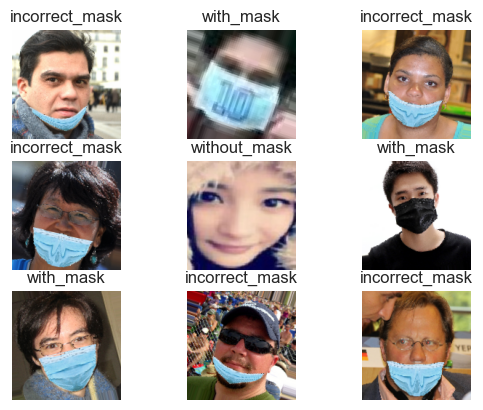

In [124]:
image_batch, labels_batch = data_train.next()

for i in range(9):
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(image_batch[i])
      label = labels_batch[i]
      if np.array_equal(label, np.array([1., 0., 0.])):
            plt.title('incorrect_mask')
      elif np.array_equal(label, np.array([0., 1., 0.])):
            plt.title('with_mask')
      else:
            plt.title('without_mask')
      plt.axis("off")

## PCA
In order to reduce the images dimension we will use PCA.

In [110]:
x_train = []
y_train = []
for i in range(14):
    x_batch, y_batch = next(data_train)
    x_train.append(x_batch)
    y_train.append(y_batch)
x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

reduce_data = x_train.reshape(x_train.shape[0], -1)
pca = PCA()
pca.fit(reduce_data)
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>95)
print("max k for 95%: ", k)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


max k for 95%:  587


#### --> We will reduce the images dimension from 150*150 to 587 due to PCA!

In [111]:
x_test = []
y_test = []
for i in range(90):
    x_batch, y_batch = next(data_test)
    x_test.append(x_batch)
    y_test.append(y_batch)
x_test = np.concatenate(x_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

In [112]:
# Instead of y_trains[0] = [1,0,0] -> y_train[0] = 0
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

In [113]:
print("train shape: ", x_train.shape ,"\n",
      "train labels shape: ", y_train.shape, "\n",
      "test shape: ", x_test.shape, "\n",
      "test labels shape: " ,y_test.shape)

train shape:  (10828, 150, 150, 3) 
 train labels shape:  (10828,) 
 test shape:  (2880, 150, 150, 3) 
 test labels shape:  (2880,)


In [114]:
# Fit PCA to training data
pca = PCA(n_components=k)
pca.fit(reduce_data)

# Transform training and testing data using PCA
x_train_pca = pca.transform(reduce_data)
x_test_pca = pca.transform(x_test.reshape(x_test.shape[0], -1))

In [115]:
print(x_train_pca.shape)
print(x_test_pca.shape)

(10828, 587)
(2880, 587)


### Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier
# Train and evaluate RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_pca, y_train)
train_acc = rf.score(x_train_pca, y_train)
score = rf.score(x_test_pca, y_test)
print("Train accuracy:", train_acc )
print("Test accuracy:", score)

Train accuracy: 1.0
Test accuracy: 0.8260416666666667


### SGDC

In [117]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty='l2', max_iter=1000, random_state=42)
sgd.fit(x_train_pca, y_train)
train_acc = rf.score(x_train_pca, y_train)
score = sgd.score(x_test_pca, y_test)
print("Train accuracy:", train_acc )
print("Test accuracy:", score)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Train accuracy: 1.0
Test accuracy: 0.8829861111111111


We get an overfitting on the training data, it is possible that too much information was lost during the
dimensionality reduction step, and the model is not able to capture the important features that distinguish the
different classes.

## Deap Learning - CNN model architecture
In this model architecture,
we have used 3 Convolutional layers followed by 3 MaxPooling layers,
a flatten layer to convert the 3D tensor into a 1D tensor, a Dropout layer to avoid overfitting,
and finally two Dense layers to classify the images into 3 classes.

In [ ]:
model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dropout(0.5))
model_cnn.add(layers.Dense(64, activation='relu'))
model_cnn.add(layers.Dense(3, activation='softmax'))

### Compile the model
Here we have used 'categorical_crossentropy' as the loss function,
'adam' as the optimizer,
and 'accuracy' as the metric to evaluate the performance of the model.

In [ ]:
model_cnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Train the model

In [ ]:
history = model_cnn.fit(data_train, epochs=4)

### save the model - for future predict

In [ ]:
# Save the model
model_cnn.save('cnn_model.h5')

## plot the accuracy & loss during the train

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

### Acuuracy & Loss on Train and Test

In [ ]:
model_cnn_load = load_model('cnn_model.h5')

In [ ]:
# Evaluate the model on the train data
train_loss, train_acc = model_cnn_load.evaluate(data_test)
print('Train Loss:', train_loss)
print('Train Accuracy:', train_acc)

# Evaluate the model on the test data
test_loss, test_acc = model_cnn_load.evaluate(data_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

In [ ]:
# Get the number of samples in the test set
num_samples = len(data_test.filenames)

# Generate predictions for the entire test set
predictions = model_cnn_load.predict(data_test, steps=num_samples // data_test.batch_size)

# Convert predictions from probabilities to class labels
y_pred = predictions.argmax(1)

# Get the true labels for the test set
y_true = data_test.labels[:2880]

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)

In [ ]:
# Define the class labels
class_labels = list(data_test.class_indices.keys())

# Plot the confusion matrix as a heatmap
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues', ax=ax)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


## results

   * train: 93.1%
   * test: 93.0%

-->  the model learned the data well, and there is no overfitting!

in addition, the confusion matrix has good results too



## Machine Learning using Encoder
  Now, we would like to run machine learning models and for this purpose we will create an encoder model that
  will encode each image into a vector and thus reduce the size of the images instead of a 150*150 vector we will
  get a 64 size vector!

In [131]:
encoder = models.Sequential()
encoder.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
encoder.add(layers.MaxPooling2D((2, 2)))
encoder.add(layers.Conv2D(64, (3, 3), activation='relu'))
encoder.add(layers.MaxPooling2D((2, 2)))
encoder.add(layers.Flatten())
encoder.add(layers.Dropout(0.5))
encoder.add(layers.Dense(64, activation='relu'))
encoder.add(layers.Dense(3, activation='softmax'))

encoder.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
### Train the model
history = encoder.fit(data_train, epochs=4)

Epoch 1/4
 3/15 [=====>........................] - ETA: 3:05 - loss: 1.7172 - accuracy: 0.3748

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


15/15 [==============================] - 203s 14s/step - loss: 1.3022 - accuracy: 0.4363
Epoch 2/4
15/15 [==============================] - 204s 13s/step - loss: 0.4805 - accuracy: 0.8466
Epoch 3/4
15/15 [==============================] - 202s 13s/step - loss: 0.2385 - accuracy: 0.9153
Epoch 4/4
15/15 [==============================] - 205s 13s/step - loss: 0.2037 - accuracy: 0.9299


In [133]:
from keras.models import Model
# Extract features using the trained CNN model
encoder_vec = Model(inputs=encoder.input, outputs=encoder.layers[-2].output)

train_features = []
train_labels = []
train_range= len(data_train.filenames) // data_train.batch_size
for i in range(train_range):
    x_batch, y_batch = next(data_train)
    features = encoder_vec.predict(x_batch)
    train_features.append(features)
    train_labels.append(y_batch)
train_features = np.concatenate(train_features, axis=0)
train_labels = np.concatenate(train_labels, axis=0)

test_features = []
test_labels = []
test_range = len(data_test.filenames) // data_test.batch_size
for i in range(test_range ):
    x_batch, y_batch = next(data_test)
    features = encoder_vec.predict(x_batch)
    test_features.append(features)
    test_labels.append(y_batch)
test_features = np.concatenate(test_features, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

25/25 [==============================] - 2s 89ms/step


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 0s 102ms/step


In [134]:
train_features

array([[0.       , 0.       , 0.       , ..., 0.       , 6.242261 ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 5.6149316,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.7696983,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 1.6259189,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 3.124671 ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [135]:
# Instead of train_labels[0] = [1,0,0] -> train_labels[0] = 0
train_labels = np.argmax(train_labels, axis=1)
test_labels = np.argmax(test_labels, axis=1)

In [136]:
print("train shape: ", train_features.shape ,"\n",
      "train labels shape: ", train_labels.shape, "\n",
      "test shape: ", test_features.shape, "\n",
      "test labels shape: " ,test_labels.shape)

train shape:  (10828, 64) 
 train labels shape:  (10828,) 
 test shape:  (2876, 64) 
 test labels shape:  (2876,)


In [139]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score, recall_score

#this function get the model and print the Accuracy and the Confusion Matrix
def printAcc(model):
    model.fit(train_features, train_labels)
    train_acc = model.score(train_features, train_labels)
    test_acc = model.score(test_features, test_labels)

    print("Train accuracy: " ,train_acc)
    print("Test accuracy: ", test_acc)

    # Calculate the confusion matrix, precision and recall for the test set
    y_pred = model.predict(test_features)
    cm = confusion_matrix(test_labels, y_pred)
    precision = precision_score(test_labels, y_pred, average='weighted')
    recall = recall_score(test_labels, y_pred, average='weighted')

    # Print precision and recall
    print("Precision: ", precision)
    print("Recall: ", recall)

    # Plot the confusion matrix using seaborn's heatmap
    sns.heatmap(cm, annot=True,fmt='.0f', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion matrix for '+str(model)+' model')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()



# Logistic Regression

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train accuracy:  0.9420945696342815
Test accuracy:  0.9436717663421419
Precision:  0.9442753341730746
Recall:  0.9436717663421419


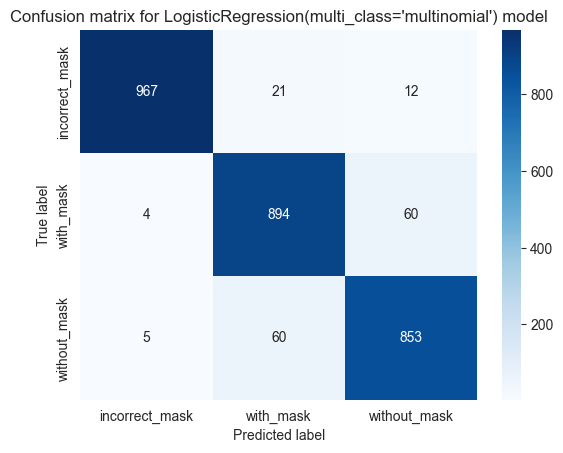

In [140]:
from sklearn.linear_model import LogisticRegression

# Train a machine learning model on the extracted features
lOGclf = LogisticRegression(solver='lbfgs', multi_class='multinomial')
printAcc(lOGclf)


# Random Forest

Train accuracy:  1.0
Test accuracy:  0.9499304589707928
Precision:  0.9504426937490214
Recall:  0.9499304589707928


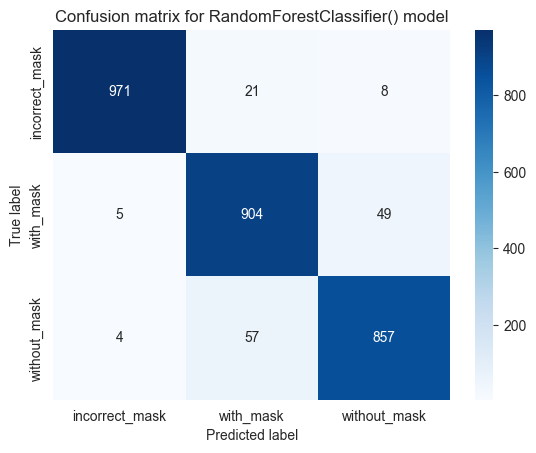

In [141]:

RANDclf = RandomForestClassifier()
printAcc(RANDclf)

# KNN nearest neighborhood

Train accuracy:  0.958348725526413
Test accuracy:  0.9342837273991655
Precision:  0.9342846075322275
Recall:  0.9342837273991655


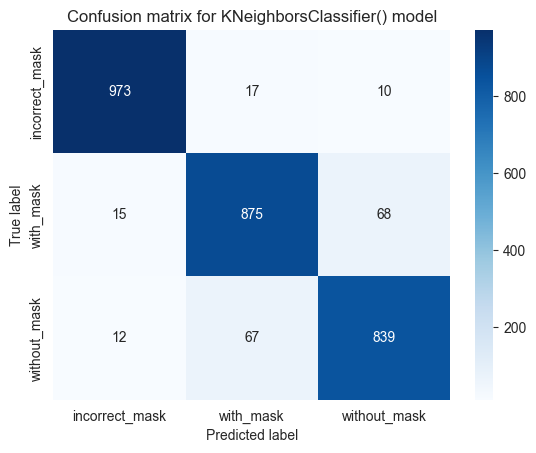

In [142]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN model on the extracted features
knn = KNeighborsClassifier(n_neighbors=5)
printAcc(knn)

Train accuracy:  0.9424639822681936
Test accuracy:  0.9464534075104312
Precision:  0.9470124475151076
Recall:  0.9464534075104312


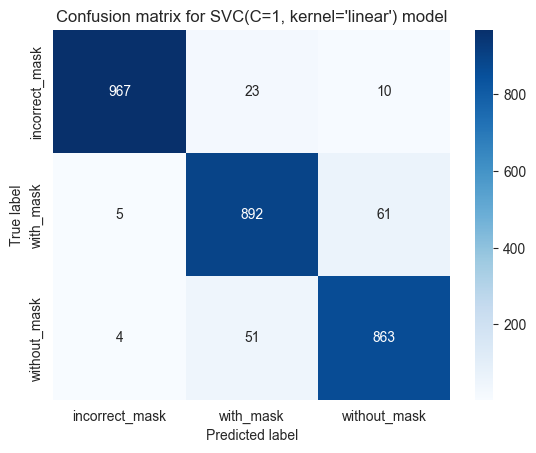

In [143]:
from sklearn import svm

# Train an SVM model on the extracted features
svm_model = svm.SVC(kernel='linear', C=1, gamma='scale')
printAcc(svm_model)

Train accuracy:  1.0
Test accuracy:  0.9172461752433936
Precision:  0.9170019844596106
Recall:  0.9172461752433936


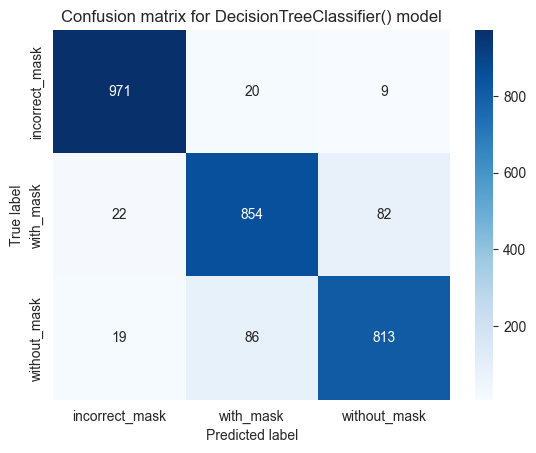

In [144]:
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree model on the extracted features
tree = DecisionTreeClassifier()
printAcc(tree)


We can see for DecisionTreeClassifier and RandomForestClassifier accuracy of 100% on the train data, this is
not overfitting because we get high accuracy for the test data. This is due to the extensive
training of the encoder, we created a deep learning model with layers and trained it until it got the best
weights on the train data, we took the one penultimate layer (before activation) and placed it as the new
vectors that represent the image, so it makes sense that strong models As these will be able to predict the
train with 100 percent accuracy